<a href="https://colab.research.google.com/github/PrathmeshPawarb/Data-Science-Machine-Learning-Assignments/blob/main/Multi_Linear_Regression_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

#Toyota

In [ ]:
df=pd.read_csv("Toyota.csv", encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
#Consider only the below columns and prepare a prediction model for predicting Price.

# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [ ]:
toyota= df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Axes: >

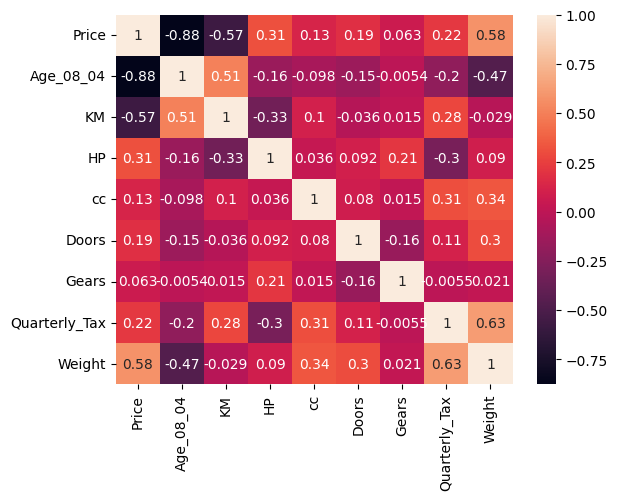

In [ ]:
sns.heatmap(toyota.corr(),annot=True)

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
toyota.iloc[:,:]= sc.fit_transform(toyota.iloc[:,:])


<ipython-input-112-0e9ebfd77074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota.iloc[:,:]= sc.fit_transform(toyota.iloc[:,:])


In [ ]:
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.853577


In [ ]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [ ]:
#model building
model= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota).fit()

In [ ]:
model.summary()

# R2 value around 86% with considering parameters like age,km,hp,cc,doorgears,tax

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:37:13   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1231.
Df Residuals:                    1427   BIC:                             1278.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.109e-16      0.010   3.18e-14      1.000      -0.019       0.019
Age_08_04        -0.6239      0.013    -46.512      0.000      -0.650      -0.598
KM               -0.2153      0.013    -16.622      0.000      -0.241      -0.190
HP                0.1309      0.012     11.241      0.000       0.108       0.154
cc               -0.0142      0.011     -1.344      0.179      -0.035       0.007
Doors            -0.0004      0.011     -0.040      0.968      -0.021       0.020
Gears             0.0309      0.010      3.016      0.003       0.011       0.051
Quarterly_Tax     0.0448      0.015      3.015      0.003       0.016       0.074
Weight            0.2461      0.015     15.880      0.000       0.216       0.277
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         3.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
md= smf.ols('Price~KM+Age_08_04+Quarterly_Tax+Weight', data=toyota).fit()
md.summary()

#R2 value is 84.8%  with only km,age,tax and weight

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2001.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:37:13   Log-Likelihood:                -683.27
No. Observations:                1436   AIC:                             1377.
Df Residuals:                    1431   BIC:                             1403.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.109e-16      0.010   3.02e-14      1.000      -0.020       0.020
KM               -0.2425      0.013    -18.171      0.000      -0.269      -0.216
Age_08_04        -0.6186      0.014    -43.814      0.000      -0.646      -0.591
Quarterly_Tax    -0.0223      0.014     -1.553      0.121      -0.050       0.006
Weight            0.2973      0.015     20.079      0.000       0.268       0.326
==============================================================================
Omnibus:                      252.346   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2688.639
Skew:                          -0.475   Prob(JB):                         0.00
Kurtosis:                       9.636   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----------------------------------------------------------------

#50 startup

In [ ]:
datafile=pd.read_csv('/content/50_Startups.csv')

In [ ]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
datafile.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#renamed the columns
datafile.rename(columns={'R&D Spend':'Research','Administration':'Adm','Marketing Spend':'Market'}, inplace=True)

In [ ]:
datafile.head()

,Research,Adm,Market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
datafile['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
# using LableEncoder to tranform 'state' data into numeric form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

datafile["State"]= le.fit_transform(datafile["State"])

datafile.head()

,Research,Adm,Market,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [ ]:
# standardization (StandardScaler) imported already


datafile.iloc[:,:]= sc.fit_transform(datafile.iloc[:,:])


datafile.head()

,Research,Adm,Market,State,Profit
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [ ]:
datafile.corr()

,Research,Adm,Market,State,Profit
Research,1.000000,0.241955,0.724248,0.104685,0.972900
Adm,0.241955,1.000000,-0.032154,0.011847,0.200717
Market,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [ ]:
#model buliding
md1= smf.ols('Profit~Research+Adm+Market+State+Profit', data=datafile).fit()
md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.656e+31
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:37:13   Log-Likelihood:                 1671.8
No. Observations:                  50   AIC:                            -3332.
Df Residuals:                      44   BIC:                            -3320.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.551e-16    1.1e-16     -5.051      0.000   -7.77e-16   -3.34e-16
Research   -5.551e-16   4.86e-16     -1.142      0.260   -1.54e-15    4.25e-16
Adm        -3.192e-16    1.2e-16     -2.671      0.011    -5.6e-16   -7.83e-17
Market      3.816e-16   1.73e-16      2.212      0.032    3.38e-17    7.29e-16
State       8.072e-17   1.11e-16      0.730      0.469   -1.42e-16    3.03e-16
Profit         1.0000   4.95e-16   2.02e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.853   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                1.946
Skew:                           0.283   Prob(JB):                        0.378
Kurtosis:                       2.217   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#An R2 of 1 indicates that the regression predictions perfectly fit the data.

In [ ]:
md2= smf.ols('Profit~Research+Adm+Market+Profit', data=datafile).fit()
md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.746e+30
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:42:46   Log-Likelihood:                 1652.4
No. Observations:                  50   AIC:                            -3295.
Df Residuals:                      45   BIC:                            -3285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.551e-16    1.6e-16     -3.466      0.001   -8.78e-16   -2.33e-16
Research   -3.331e-16   7.08e-16     -0.470      0.641   -1.76e-15    1.09e-15
Adm        -2.637e-16   1.74e-16     -1.514      0.137   -6.14e-16    8.71e-17
Market     -7.633e-17   2.51e-16     -0.304      0.763   -5.83e-16     4.3e-16
Profit         1.0000   7.22e-16   1.39e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.751
Skew:                          -0.120   Prob(JB):                        0.687
Kurtosis:                       2.450   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

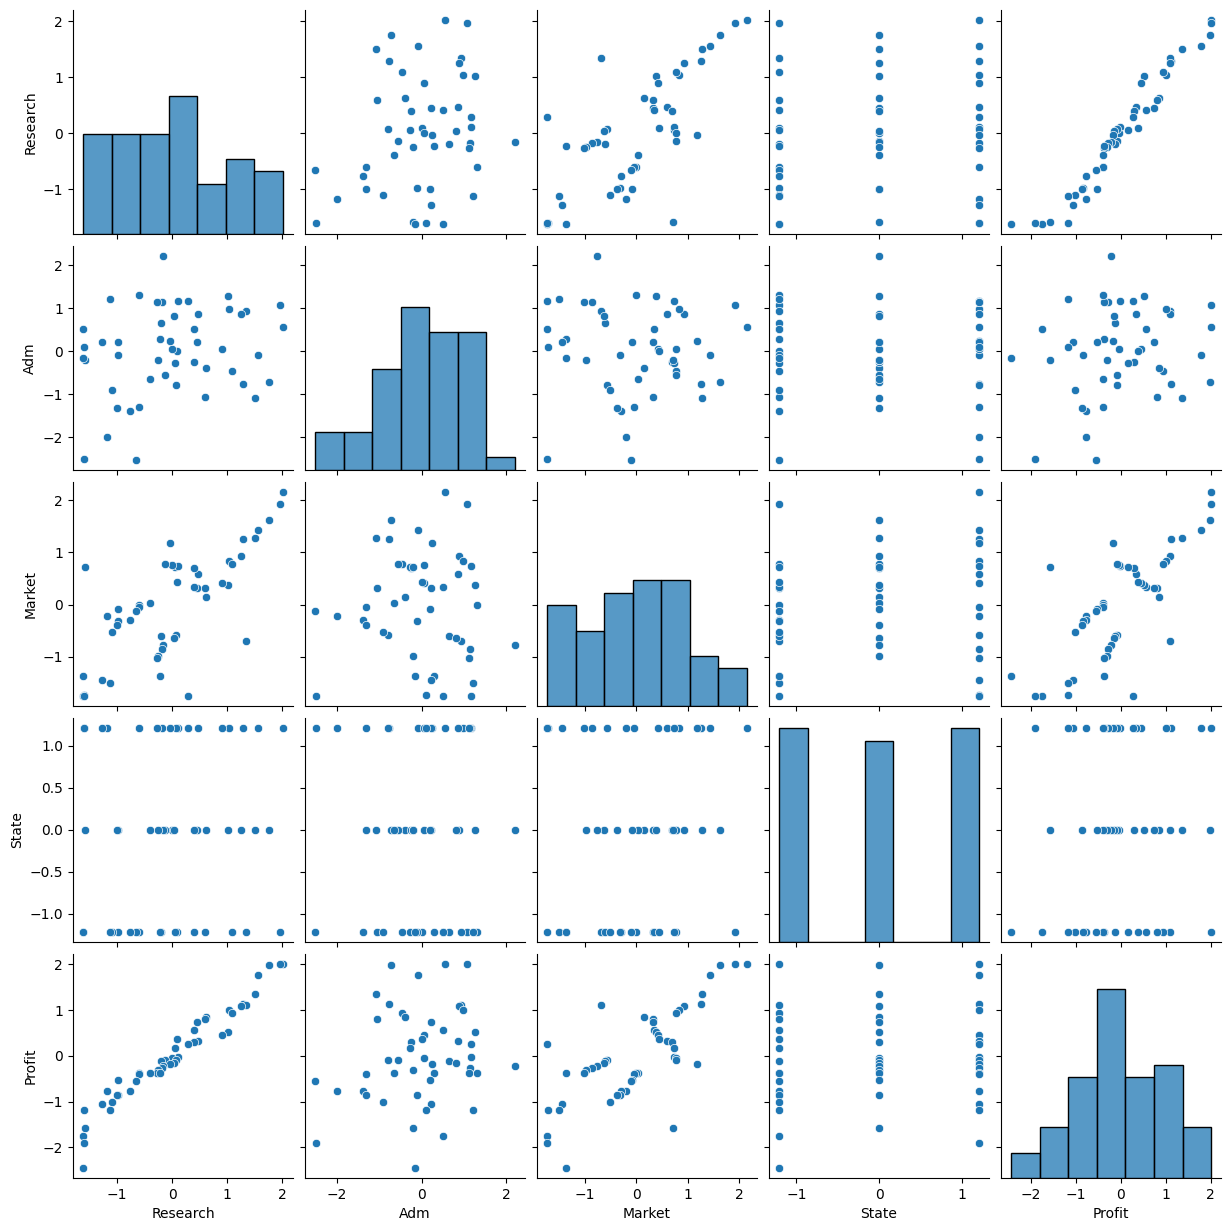

In [ ]:
sns.pairplot(datafile)